In [269]:
import numpy as np
import pandas as pd
import requests
import math
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
# from sklearn.impute import SimpleImputer
# from tensorflow.keras.preprocessing.text import Tokenizer

In [268]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.6/764.6 KB 5.2 MB/s eta 0:00:0000:0100:01
  Using cached click-8.0.4-py3-none-any.whl (97 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 KB 3.1 MB/s eta 0:00:00


In [236]:
df = pd.read_csv("../raw_data/steam_games.csv")
df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [12]:
df[df['original_price'].str.contains("demo",case=False)==True][['url','name']]

,url,name
54,https://store.steampowered.com/app/356190/Midd...,Middle-earth™: Shadow of War™
208,https://store.steampowered.com/app/637650/FINA...,FINAL FANTASY XV WINDOWS EDITION
572,https://store.steampowered.com/app/606230/Thea...,Thea 2: The Shattering
577,https://store.steampowered.com/app/368340/Cros...,CrossCode
1003,https://store.steampowered.com/app/461430/Emer...,EmergeNYC
...,...,...
40284,https://store.steampowered.com/app/1048610/Lov...,Love Mythos: Sanctuary Island
40381,https://store.steampowered.com/app/1079830/Cri...,Cris Tales
40438,https://store.steampowered.com/app/891790/Devi...,Devil Engine
40467,https://store.steampowered.com/app/910630/Arca...,Arcade Spirits


In [112]:
df.iloc[54]

url                         https://store.steampowered.com/app/356190/Midd...
types                                                                     app
name                                            Middle-earth™: Shadow of War™
desc_snippet                Experience an epic open-world brought to life ...
recent_reviews              Mostly Positive,(264),- 77% of the 264 user re...
all_reviews                 Mostly Positive,(16,973),- 77% of the 16,973 u...
release_date                                                      Oct 9, 2017
developer                                                Monolith Productions
publisher                                                   WB Games,WB Games
popular_tags                Open World,Action,RPG,Fantasy,Singleplayer,Adv...
game_details                Single-player,Steam Achievements,Full controll...
languages                   English,French,Italian,German,Spanish - Spain,...
achievements                                                    

In [107]:
df.iloc[3615]['minimum_requirements']

'Minimum:,OS:,Windows XP, Vista, 7, 8 or 8.1, 10,Processor:,2.0 GHz dual core processor,Memory:,2 GB RAM,Graphics:,1024MB. OpenGL 2.0+ recommended.,Network:,Broadband Internet connection,Storage:,512 MB available space,Additional Notes:,Can run at 60+ fps. Requires the internet to save your progress, stats and highscores.,Minimum:,OS:,Ubuntu 12.04,Processor:,2.0 GHz dual core processor,Memory:,2 GB RAM,Graphics:,512MB. OpenGL 2.0+ recommended.,Network:,Broadband Internet connection,Storage:,512 MB available space,Additional Notes:,Can run at 60+ fps. Requires the internet to save your progress, stats and highscores.'

In [109]:
df.iloc[4173]

url                         https://store.steampowered.com/app/781480/Tech...
types                                                                     app
name                                              Tech Support: Error Unknown
desc_snippet                Things are not what they seem at your new tech...
recent_reviews              Mixed,(11),- 63% of the 11 user reviews in the...
all_reviews                 Mixed,(110),- 69% of the 110 user reviews for ...
release_date                                                     Feb 27, 2019
developer                                                      Dragon Slumber
publisher                             Iceberg Interactive,Iceberg Interactive
popular_tags                Simulation,Adventure,Hacking,Story Rich,Indie,...
game_details                Single-player,Steam Achievements,Steam Trading...
languages                                   English,German,Simplified Chinese
achievements                                                    

In [110]:
df.iloc[3234]['minimum_requirements']

'Minimum:,OS:,Windows 7,Processor:,Core i5,Memory:,4 GB RAM,Graphics:,2x Anti-aliasing,DirectX:,Version 10,Storage:,150 MB available space,Minimum:,OS:,macOS 10.9,Processor:,Core i5,Memory:,2 GB RAM,Graphics:,2x Anti-aliasing,Storage:,170 MB available space'

In [17]:
df.columns

Index(['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews',
       'release_date', 'developer', 'publisher', 'popular_tags',
       'game_details', 'languages', 'achievements', 'genre',
       'game_description', 'mature_content', 'minimum_requirements',
       'recommended_requirements', 'original_price', 'discount_price'],
      dtype='object')

In [18]:
len(df.columns)

20

In [19]:
df.types.value_counts()

app       38021
bundle     2572
sub         238
Name: types, dtype: int64

In [237]:
df = df.drop(['recent_reviews', 'discount_price'], axis=1)
df = df[df['types']!='bundle']
df.head()

,url,types,name,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free


In [238]:
df.shape

(38261, 18)

In [22]:
df.columns

Index(['url', 'types', 'name', 'desc_snippet', 'all_reviews', 'release_date',
       'developer', 'publisher', 'popular_tags', 'game_details', 'languages',
       'achievements', 'genre', 'game_description', 'mature_content',
       'minimum_requirements', 'recommended_requirements', 'original_price'],
      dtype='object')

In [23]:
df.loc[df['types']=='bundle']

,url,types,name,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price


In [24]:
df.head()

,url,types,name,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free


In [239]:
df = df[df['types']!='sub']
df.shape

(38023, 18)

In [26]:
df.loc[df['types']=='sub']

,url,types,name,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price


In [27]:
df['types'].isnull().sum()

2

In [218]:
df['types'] = df['types'].dropna() 
df.shape

(38023, 18)

In [240]:
df['types']=df['types'].astype(str)
df.shape

(38023, 18)

In [30]:
type(df['types'][704])

str

In [241]:
df=df[df['types']!='nan']

In [221]:
df.shape

(38021, 18)

In [242]:
my_df= df[['url','genre', 'game_description', 'mature_content',
       'minimum_requirements', 'recommended_requirements', 'original_price']].copy()
type(my_df)

pandas.core.frame.DataFrame

In [227]:
my_df['genre'].value_counts()

Action                                                               2236
Action,Indie                                                         2045
Casual,Indie                                                         1632
Action,Adventure,Indie                                               1503
Adventure,Indie                                                      1420
                                                                     ... 
Casual,Indie,RPG,Simulation,Sports,Strategy                             1
Action,Casual,Free to Play,Indie,Simulation,Strategy,Early Access       1
Action,Casual,Indie,RPG,Simulation,Strategy,Early Access                1
Action,Casual,Indie,Massively Multiplayer,Simulation,Strategy           1
Casual,Free to Play,Indie,Massively Multiplayer,Simulation,Sports       1
Name: genre, Length: 1185, dtype: int64

In [228]:
print(f"""number of genres: {my_df['genre'].unique().size}\n\
number of descriptions: {my_df['game_description'].unique().size}\n\
number of mature content: {my_df['mature_content'].unique().size}\n\
number of min req: {my_df['minimum_requirements'].unique().size}\n\
number of rec requ: {my_df['recommended_requirements'].unique().size}\n\
number of prices: {my_df['original_price'].unique().size}""")

number of genres: 1186
number of descriptions: 37497
number of mature content: 1268
number of min req: 14763
number of rec requ: 13837
number of prices: 630


In [229]:
my_df.isnull().sum().sort_values(ascending=False)/len(my_df)

mature_content              0.923805
minimum_requirements        0.445859
recommended_requirements    0.445701
original_price              0.079482
genre                       0.010415
game_description            0.002656
url                         0.000000
dtype: float64

In [243]:
my_df.loc[211]

url                         https://store.steampowered.com/app/900883/The_...
genre                                                                     NaN
game_description             About This Game The Elder Scrolls IV: Oblivio...
mature_content                                                            NaN
minimum_requirements                                                      NaN
recommended_requirements                                                  NaN
original_price                                                         $19.99
Name: 211, dtype: object

In [244]:
my_df[my_df['genre'].isna() ==True]

,url,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
211,https://store.steampowered.com/app/900883/The_...,NaN,About This Game The Elder Scrolls IV: Oblivio...,NaN,NaN,NaN,$19.99
528,https://store.steampowered.com/app/241930/Midd...,NaN,About This Game Fight through Mordor and unco...,NaN,"Minimum:,OS:,64-bit: Vista SP2, Win 7 SP1, Win...","Recommended:,OS:,64-bit: Win 7 SP1, Win 8.1,Pr...",$19.99
1613,https://store.steampowered.com/app/71250/Sonic...,NaN,About This Game An ancient evil lurking withi...,NaN,"Minimum:,OS:,Windows® XP,Processor:,3.0 GHz In...","Recommended:,OS:,Windows® 7,Processor:,2.0 GHz...",$7.99
2254,https://store.steampowered.com/app/667720/Red_...,NaN,About This Game Set 50 years after the climac...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7, Windows 8, Windows 10 ...","Recommended:,OS:,Windows 7, Windows 8, Windows...",$19.99
2574,https://store.steampowered.com/app/758230/NEKO...,NaN,About This Video Nekopara is now turned into ...,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Core 2...","Recommended:,OS:,Windows 10,Processor:,Intel C...",$29.99
...,...,...,...,...,...,...,...
39860,https://store.steampowered.com/app/964550/Red_...,NaN,"About This Series In the distant future, two ...",NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Core 2...","Recommended:,OS:,Windows 10,Processor:,Intel C...",$1.99
40133,https://store.steampowered.com/app/795330/Robo...,NaN,About This Series This tutorial is about how ...,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Core 2...","Recommended:,OS:,Windows 10,Processor:,Intel C...",$3.99
40234,https://store.steampowered.com/app/404110/Work...,NaN,About This Video In this tutorial I go throug...,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Core 2...","Recommended:,OS:,Windows 10,Processor:,Intel C...",$9.99
40367,https://store.steampowered.com/app/442310/Fore...,NaN,About This Video We will be creating a tiling...,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Core 2...","Recommended:,OS:,Windows 10,Processor:,Intel C...",$49.99


In [231]:
my_df['genre']=my_df['genre'].astype(str)

In [55]:
my_df['genre'] = my_df['genre'].dropna(axis=0)
my_df

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99
1,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99
2,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99
3,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99
4,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free
...,...,...,...,...,...,...
40828,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40829,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40830,"Indie,RPG,Strategy",About This Content Quests of Doom 4: A Midni...,NaN,"Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...",$7.99
40831,Action,About This Content Get equipped with the stun...,NaN,"Minimum:,OS:,WINDOWS® 7 (64bit),Processor:,Int...","Recommended:,OS:,WINDOWS®10 (64bit),Processor:...",$9.99


In [273]:
my_df=my_df[my_df['genre']!='nan']

In [274]:
my_df.shape

(38021, 7)

In [58]:
my_df.isnull().sum().sort_values(ascending=False)/len(my_df)

mature_content              0.923429
minimum_requirements        0.447017
recommended_requirements    0.446857
original_price              0.078937
game_description            0.002259
genre                       0.000000
dtype: float64

In [275]:
my_df['genre'].isna().sum()

396

In [276]:
len(my_df[my_df['game_description'].isna() ==True])

101

In [61]:
my_df

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99
1,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99
2,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99
3,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99
4,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free
...,...,...,...,...,...,...
40828,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40829,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40830,"Indie,RPG,Strategy",About This Content Quests of Doom 4: A Midni...,NaN,"Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...",$7.99
40831,Action,About This Content Get equipped with the stun...,NaN,"Minimum:,OS:,WINDOWS® 7 (64bit),Processor:,Int...","Recommended:,OS:,WINDOWS®10 (64bit),Processor:...",$9.99


In [186]:
df.iloc[1228]

url                         https://store.steampowered.com/app/3320/Insani...
types                                                                     app
name                                                     Insaniquarium Deluxe
desc_snippet                                                              NaN
recent_reviews              Very Positive,(28),- 96% of the 28 user review...
all_reviews                 Overwhelmingly Positive,(1,191),- 95% of the 1...
release_date                                                     Aug 30, 2006
developer                                                  PopCap Games, Inc.
publisher                               PopCap Games, Inc.,PopCap Games, Inc.
popular_tags                Casual,Simulation,Classic,Singleplayer,Underwa...
game_details                                                    Single-player
languages                                                             English
achievements                                                    

In [187]:
df.iloc[2797]

url                         https://store.steampowered.com/app/3300/Bejewe...
types                                                                     app
name                                                       Bejeweled 2 Deluxe
desc_snippet                                                              NaN
recent_reviews                                                            NaN
all_reviews                 Very Positive,(126),- 89% of the 126 user revi...
release_date                                                     Aug 30, 2006
developer                                                  PopCap Games, Inc.
publisher                               PopCap Games, Inc.,PopCap Games, Inc.
popular_tags                               Casual,Match 3,Puzzle,Singleplayer
game_details                                                    Single-player
languages                       English,French,German,Italian,Spanish - Spain
achievements                                                    

In [62]:
my_df[my_df['game_description'].isna() ==True]

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
1228,Casual,NaN,NaN,NaN,NaN,$4.99
2797,Casual,NaN,NaN,NaN,NaN,$4.99
2850,Casual,NaN,NaN,NaN,NaN,$4.99
3277,Casual,NaN,NaN,NaN,NaN,$4.99
3692,Casual,NaN,NaN,NaN,NaN,$4.99
...,...,...,...,...,...,...
35799,"Action,Adventure",NaN,NaN,NaN,NaN,NaN
35820,"Adventure,Indie",NaN,NaN,NaN,NaN,$4.99
37143,"Casual,Indie",NaN,NaN,"Minimum:,OS:,Windows Vista / XP / 7,Processor:...","Recommended:,OS:,Windows Vista / XP / 7,Proces...",$0.99
38744,Action,NaN,Mature Content Description The developers de...,NaN,NaN,NaN


In [63]:
my_df.shape

(37625, 6)

In [277]:
my_df2 =my_df.copy()

In [65]:
my_df2['game_description']=my_df2['game_description'].astype(str)

In [66]:
my_df2=my_df2[my_df2['game_description']!='nan']
my_df2.shape

(37540, 6)

In [67]:
df[df['desc_snippet'].isna() ==True]

,url,types,name,desc_snippet,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
827,https://store.steampowered.com/app/441340/Elit...,app,Elite Dangerous: Horizons Season Pass,NaN,"Mostly Positive,(1,082),- 76% of the 1,082 use...","Dec 15, 2015",Frontier Developments,"Frontier Developments,Frontier Developments","Space,Simulation,Massively Multiplayer,Action,...","Single-player,Multi-player,MMO,Co-op,Downloada...","English,French,German,Russian,Spanish - Spain",NaN,"Action,Adventure,Massively Multiplayer,RPG,Sim...",About This Content Change the galaxy with the...,NaN,"Minimum:,OS:,Windows 7/8/10 64-bit,Processor:,...","Recommended:,OS:,Windows 7/8/10 64-bit,Process...",$29.99
1228,https://store.steampowered.com/app/3320/Insani...,app,Insaniquarium Deluxe,NaN,"Overwhelmingly Positive,(1,191),- 95% of the 1...","Aug 30, 2006","PopCap Games, Inc.","PopCap Games, Inc.,PopCap Games, Inc.","Casual,Simulation,Classic,Singleplayer,Underwa...",Single-player,English,NaN,Casual,NaN,NaN,NaN,NaN,$4.99
1772,https://store.steampowered.com/app/57600/Tropi...,app,Tropico 3: Absolute Power,NaN,"Very Positive,(223),- 94% of the 223 user revi...","May 17, 2010",Haemimont Games,"Kalypso Media Digital,Kalypso Media Digital","Simulation,Strategy,City Builder,Economy,Great...","Single-player,Downloadable Content","English,French,German,Italian,Spanish - Spain",NaN,"Simulation,Strategy",About This Content Tropico 3: Absolute Power...,NaN,NaN,NaN,$9.99
2105,https://store.steampowered.com/app/9070/DOOM_3...,app,DOOM 3 Resurrection of Evil,NaN,"Very Positive,(338),- 84% of the 338 user revi...","Apr 3, 2005",id Software,"id Software,id Software","Action,FPS,Horror,Sci-fi,Dark,Atmospheric,Shoo...","Single-player,Multi-player,Downloadable Conten...",English,NaN,Action,About This Content The gripping expansion pa...,NaN,NaN,NaN,$2.99
2376,https://store.steampowered.com/app/201310/X3_A...,app,X3: Albion Prelude,NaN,"Very Positive,(1,042),- 92% of the 1,042 user ...","Dec 15, 2011",Egosoft,"Egosoft,Egosoft","Space,Simulation,Sandbox,Sci-fi,Action,Trading...","Single-player,Downloadable Content,Steam Achie...","English,French,German,Italian,Russian,Polish,S...",33.0,"Action,Simulation",About This Content X3: Albion Prelude is the ...,NaN,"Minimum:,OS:,Windows 10 / 8 / 7 / Vista SP1 / ...","Recommended:,OS:,Windows 10 / 8 / 7 / Vista SP...",$9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40827,https://store.steampowered.com/app/899835/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Primo Victoria"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40828,https://store.steampowered.com/app/899836/Rock...,app,Rocksmith® 2014 Edition – Remastered – Sabaton...,NaN,NaN,"Feb 12, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40829,https://store.steampowered.com/app/899832/Rock...,app,Rocksmith® 2014 Edition – Remastered – Stone T...,NaN,NaN,"Feb 5, 2019",Ubisoft - San Francisco,NaN,"Casual,Simulation","Single-player,Shared/Split Screen,Downloadable...","English,German,French,Italian,Spanish - Spain,...",NaN,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99


In [68]:
my_df2['game_description']

0         About This Game Developed by id software, the...
1         About This Game  PLAYERUNKNOWN'S BATTLEGROUND...
2         About This Game  From original BATTLETECH/Mec...
3         About This Game The post-soviet country of Ch...
4                                        About This Game  
                               ...                        
40828     About This Content Play "Ghost Division" by S...
40829     About This Content Play "Trippin’ on a Hole i...
40830     About This Content  Quests of Doom 4: A Midni...
40831     About This Content Get equipped with the stun...
40832     About This Game  An RPG about a tribe explori...
Name: game_description, Length: 37540, dtype: object

In [71]:
my_df2

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99
1,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99
2,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99
3,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99
4,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free
...,...,...,...,...,...,...
40828,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40829,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...",NaN,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$2.99
40830,"Indie,RPG,Strategy",About This Content Quests of Doom 4: A Midni...,NaN,"Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...",$7.99
40831,Action,About This Content Get equipped with the stun...,NaN,"Minimum:,OS:,WINDOWS® 7 (64bit),Processor:,Int...","Recommended:,OS:,WINDOWS®10 (64bit),Processor:...",$9.99


In [278]:
my_df2['mature_content'].value_counts()

 Mature Content Description  The developers describe the content like this:  This Game may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                                                                                                                                                                                    417
 Mature Content Description  The developers describe the content like this:  This DLC may contain content not appropriate for all ages, or may not be appropriate for viewing at work: Frequent Violence or Gore, General Mature Content                                                                                                                                                                                                                                     244
 Mature Content Description  The developers describe the content like 

In [73]:
my_df2['minimum_requirements'].value_counts()

Minimum:,OS:,Windows Vista, Windows 7, Windows 8,Processor:,2.66 GHz Intel Core2 Duo E6750 or 2.8 GHz AMD Athlon 64 X2 5600+,Memory:,2 GB RAM,Graphics:,256 MB DirectX 9 / NVIDIA® GeForce® 8600 GT or ATI Radeon™ HD 2600 XT,Hard Drive:,12 GB HD space,Sound:,DirectX 9.0c-compliant                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                742
Minimum:,OS:,Windows 7x , 8x or 10x,Processor:,1.6 GHz or higher processor,Memory:,1 GB RAM,Graphics:,Graphics card recommended,DirectX:,Versi

In [279]:
my_df2[my_df2.original_price.str.contains('Free')==True]

,url,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free
12,https://store.steampowered.com/app/323370/TERA/,"Action,Adventure,Free to Play,Massively Multip...",About This Game TERA is at the forefront of ...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7, 32-bit,Processor:,Inte...","Recommended:,OS:,Windows 7, 8, 8.1, 10, 64-bit...",Free to Play
18,https://store.steampowered.com/app/767560/War_...,"Action,Free to Play","About This Game War is raging, pilot! Are you...",NaN,"Minimum:,OS:,Windows 7,Processor:,2.5 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,3.2 GHz...",Free To Play
30,https://store.steampowered.com/app/372000/Tree...,"Free to Play,Massively Multiplayer,RPG","About This Game Tree of Savior (""TOS"") is an ...",NaN,"Minimum:,OS:,Windows 7 (64-bit),Processor:,Int...","Recommended:,OS:,Windows 7 (64-bit) or later,P...",Free to Play
36,https://store.steampowered.com/app/799960/Wiza...,"Free to Play,Massively Multiplayer,RPG",About This Game Embrace your inner Wizard and...,NaN,NaN,NaN,Free To Play
...,...,...,...,...,...,...,...
40361,https://store.steampowered.com/app/846360/DEEP...,"Action,Indie","About This Content Atmospheric, dynamic sound...",NaN,NaN,NaN,Free To Play
40669,https://store.steampowered.com/app/894440/Mast...,"Casual,Indie,Simulation",About This Content We present to you Belfast ...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",Free
40723,https://store.steampowered.com/app/876590/Meti...,Action,About This Content Original Score for Metis O...,NaN,"Minimum:,OS:,Any,Storage:,500 MB available space","Recommended:,OS:,Any,Storage:,500 MB available...",Free
40731,https://store.steampowered.com/app/876440/The_...,"Adventure,Indie",About This Content Take a look inside the Des...,NaN,NaN,NaN,Free


In [75]:
free= my_df2[my_df2.original_price.str.contains('Free')==True]

In [76]:
free['original_price'].value_counts()


Free                                      1283
Free To Play                               858
Free to Play                               527
Free Demo                                    8
Free Mod                                     4
Play for Free!                               3
Visual Novel, Free                           1
Play Demo for Free                           1
Free Pre-Alpha                               1
Free DEMO!                                   1
Free demo                                    1
Free Version                                 1
Free Prologue                                1
Download Free Guest Edition                  1
Try the Free Version                         1
Free Demo ( ͡~ ͜ʖ ͡°)                        1
Experience Quasar Spectrum OS for Free       1
Geneshift Free Edition                       1
🆓 Free test drives! 🈚                        1
Garrison: Archangel Free Demo                1
Shadow of the Tomb Raider Free Trial         1
Play Free Dem

In [77]:
# free = free[(free['original_price'].str.contains("free to play",case=False)==True)]
free = free[(free['original_price'].str.contains("demo",case=False)==False)  
           & (free['original_price'].str.contains("trial", case=False)==False)
           & (free['original_price'].str.contains("guest", case=False)==False)
           &(free['original_price'].str.contains("novel", case=False)==False)
           &(free['original_price'].str.contains("prologue", case=False)==False)
            &(free['original_price'].str.contains("mod", case=False)==False)]
free['original_price'].value_counts()

Free                                      1283
Free To Play                               858
Free to Play                               527
Play for Free!                               3
🆓 Free test drives! 🈚                        1
Geneshift Free Edition                       1
Experience Quasar Spectrum OS for Free       1
Try the Free Version                         1
Free Version                                 1
Free Pre-Alpha                               1
Name: original_price, dtype: int64

In [78]:
free[free['original_price'].str.contains("Geneshift Free Edition")==True]

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
3615,"Action,Indie,RPG,Early Access",About This Game PLAY FOR FREE Play the Battl...,NaN,"Minimum:,OS:,Windows XP, Vista, 7, 8 or 8.1, 1...","Recommended:,OS:,Windows XP, Vista, 7, 8 or 8....",Geneshift Free Edition


In [79]:
free[free['original_price'].str.contains("Experience Quasar Spectrum OS for Free")==True]

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
4173,"Adventure,Casual,Indie,Simulation",About This Game “On behalf of Quasar Telecom...,NaN,NaN,NaN,Experience Quasar Spectrum OS for Free


In [80]:
free[free['original_price'].str.contains("Free test drives!")==True]

,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
3234,"Action,Casual,Indie,Racing,Simulation,Sports,E...",About This Game Strap on your dandy Tesla Sh...,NaN,"Minimum:,OS:,Windows 7,Processor:,Core i5,Memo...","Recommended:,OS:,Windows 10,Processor:,Core i7...",🆓 Free test drives! 🈚


In [81]:
str(my_df2.iloc[7]['mature_content'])=='nan'

True

In [82]:
my_df2.iloc[7][['mature_content']].isna()

mature_content    True
Name: 8, dtype: bool

In [280]:

# for index in my_df2.index:
#     if my_df2.iloc[index][['mature_content']].isna().bool()==True:
#         my_df2[index]["mature_encoded"]==0
#     else:
#         my_df2.iloc[index][['mature_encoded']]==1
        
# my_df2.head(10)

my_df2=my_df2.assign(mature_encoded=lambda x: x.mature_content.isna().replace((True,False),(0,1)))
my_df2.head()

,url,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,mature_encoded
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,0
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,1
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,0
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,0
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,0


In [281]:
my_df2= my_df2.drop(columns='mature_content')
my_df2.head()

,url,genre,game_description,minimum_requirements,recommended_requirements,original_price,mature_encoded
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...","Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,0
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,1
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,0
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,0
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,0


In [85]:
def get_price(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    try: 
        return soup.find('div', class_='game_purchase_price').text.strip().split('\n')[1]
    except:
        return float('nan')

In [86]:
def get_price(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    try: 
        return soup.find('div', class_='game_purchase_price.price').text.strip('€')
    except AttributeError:
        return float('nan')

In [87]:
get_price('https://store.steampowered.com/app/907190/GRITS_Racing/')

nan

In [88]:
my_df2['genre'].value_counts()

Action                                                               2222
Action,Indie                                                         2038
Casual,Indie                                                         1631
Action,Adventure,Indie                                               1500
Adventure,Indie                                                      1415
                                                                     ... 
Casual,Indie,RPG,Simulation,Sports,Strategy                             1
Action,Casual,Free to Play,Indie,Simulation,Strategy,Early Access       1
Action,Casual,Indie,RPG,Simulation,Strategy,Early Access                1
Action,Casual,Indie,Massively Multiplayer,Simulation,Strategy           1
Casual,Free to Play,Indie,Massively Multiplayer,Simulation,Sports       1
Name: genre, Length: 1185, dtype: int64

In [89]:
### creating a loop of all the different tags, calculating the occurences to select the top used.
tags = {}
for index, row in df.iterrows():
    tags_list= str(row['popular_tags']).split(',')
    for tag in tags_list:
        if not tag in tags:
            tags[tag] = 1
        else:
            tags[tag] += 1
tags_df = pd.DataFrame(list(tags.items()),columns = ['tag','count'])
tags_df.sort_values('count', ascending =False) 

,tag,count
50,Indie,23718
2,Action,16112
42,Adventure,13378
75,Casual,12969
31,Simulation,9273
...,...,...
369,Snowboarding,3
364,BMX,3
362,ATV,3
202,Asymmetric VR,3


In [90]:
genre_dict = {}
for index, row in my_df2.iterrows():
    genre_list= str(row['genre']).split(',')
    for genre in genre_list:
        if not genre in genre_dict:
            genre_dict[genre] = 1
        else:
            genre_dict[genre] += 1
genre_df = pd.DataFrame(list(genre_dict.items()),columns = ['genre','count'])
genre_df.sort_values('count', ascending =False) 

,genre,count
6,Indie,22832
0,Action,15224
10,Casual,11990
1,Adventure,11848
8,Simulation,8703
3,Strategy,7965
5,RPG,6950
7,Early Access,2818
4,Free to Play,2613
11,Sports,1724


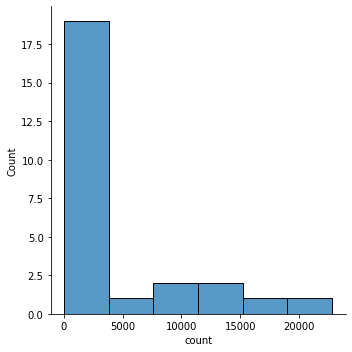

In [91]:
sns.displot(x=genre_df['count'])

In [282]:
my_df2=my_df2.assign(price=lambda x: pd.to_numeric(x.original_price.str.strip('$'), errors='coerce').replace(np.nan, 0))
my_df2.head(20)

,url,genre,game_description,minimum_requirements,recommended_requirements,original_price,mature_encoded,price
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...","Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,0,19.99
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,1,29.99
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,0,39.99
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,0,44.99
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,0,0.00
6,https://store.steampowered.com/app/601150/Devi...,Action,About This Game The Devil you know returns in...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...",$59.99,1,59.99
7,https://store.steampowered.com/app/477160/Huma...,"Adventure,Indie","About This Game ***NEW ""DARK"" LEVEL AVAILABL...","Minimum:,OS:,Windows XP/Vista/7/8/8.1/10 x86 a...","Recommended:,OS:,Windows XP/Vista/7/8/8.1/10 x...",$14.99,0,14.99
8,https://store.steampowered.com/app/644930/They...,"Strategy,Early Access",About This Game They Are Billions is a strat...,"Minimum:,OS:,Windows 7, 8, 10 (32 and 64 bits)...","Recommended:,OS:,Windows 7, 8, 10 (64 bits),P...",$29.99,0,29.99
9,https://store.steampowered.com/app/774241/Warh...,"Action,Adventure,RPG","About This Game “Keep your eyes on this one,...","Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$49.99,1,49.99
10,https://store.steampowered.com/app/527230/For_...,"Adventure,Indie,RPG,Strategy","About This Game Into The Deep, a brand new a...","Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$19.99,0,19.99


In [95]:
my_df2['price'].dtypes

dtype('float64')

In [283]:
my_df2=my_df2.drop(columns='original_price')
my_df2.head()

,url,genre,game_description,minimum_requirements,recommended_requirements,mature_encoded,price
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...","Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",0,19.99
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1,29.99
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",0,39.99
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",0,44.99
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",0,0.00


In [157]:
# def get_os(req):
#     os_list=[]
#     os_s=['windows','macos','linux']
#     for os in os_s:
#         if req.str.contains(os,case=False):
#             os_list.append(os)
        
#     return os_list

# my_df2.assign(op_sys=lambda x: get_os(x.minimum_requiremts))


In [284]:
def operating_system(requirements):
    macos = [ 'macos','osx','os x','mac']
    linux = ['ubuntu','linux','red hat','fedora', 'mint','steamos', 'chrome os']
    existing = []
    if 'windows'in str(requirements).lower():
        existing.append('windows')
    for mac in macos:
        if mac in str(requirements).lower() and 'macOS' not in existing:
            existing.append('macOS')
    for lin in linux:
        if lin in str(requirements).lower() and 'Linux' not in existing:
            existing.append('Linux')
    return " ".join(existing)

# my_df2.assign(op_sys=lambda x: operating_system(x.minimum_requirements))

In [285]:

my_df2['op_sys']= my_df2['minimum_requirements'].apply(lambda x: operating_system(x))
my_df2

,url,genre,game_description,minimum_requirements,recommended_requirements,mature_encoded,price,op_sys
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...","Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",0,19.99,windows
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1,29.99,windows
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",0,39.99,windows macOS Linux
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",0,44.99,windows
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",0,0.00,windows macOS
...,...,...,...,...,...,...,...,...
40828,https://store.steampowered.com/app/899836/Rock...,"Casual,Simulation","About This Content Play ""Ghost Division"" by S...","Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",0,2.99,windows
40829,https://store.steampowered.com/app/899832/Rock...,"Casual,Simulation","About This Content Play ""Trippin’ on a Hole i...","Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",0,2.99,windows
40830,https://store.steampowered.com/app/906840/Fant...,"Indie,RPG,Strategy",About This Content Quests of Doom 4: A Midni...,"Minimum:,OS:,Windows 7x , 8x or 10x,Processor:...","Recommended:,OS:,Windows 7x , 8x or 10x,Proces...",0,7.99,windows
40831,https://store.steampowered.com/app/906635/Mega...,Action,About This Content Get equipped with the stun...,"Minimum:,OS:,WINDOWS® 7 (64bit),Processor:,Int...","Recommended:,OS:,WINDOWS®10 (64bit),Processor:...",0,9.99,windows


In [174]:
operating_system(df.loc[40832 ,'minimum_requirements'])

''

In [175]:
operating_system(df.loc[2,'minimum_requirements'])

'windows macOS Linux'

In [185]:
my_df2['op_sys'].value_counts()

                       18243
windows                15317
windows macOS Linux     1506
windows macOS           1382
windows Linux            718
macOS Linux              134
Linux                    129
macOS                    111
Name: op_sys, dtype: int64

In [302]:
my_df3= my_df2.drop(columns=['minimum_requirements', 'recommended_requirements']).copy()

In [287]:
my_df3.head()

,url,genre,game_description,mature_encoded,price,op_sys
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...",0,19.99,windows
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,1,29.99,windows
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,0,39.99,windows macOS Linux
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,0,44.99,windows
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,0,0.00,windows macOS


In [195]:
def get_description(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    try: 
        return soup.find('div', class_='game_area_description').text.strip().split('\n')[1].strip('\t')
    except:
        return float('nan')

In [196]:
get_description('https://store.steampowered.com/app/3320/Insaniquarium_Deluxe/')

"Insaniquarium Deluxe is the craziest aquarium game ever - tend to your fish and keep them happy and they'll reward you with precious coins and jewels. Use the money you earn to buy upgrades for your tank or egg parts which hatch lots of different in-tank pets with special powers. These pets can help you feed your fish, collect coins, or even protect against the aliens that will invade your tank and wreak havoc."

In [211]:
def get_price(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    try: 
        return soup.find('div', class_='game_purchase_price').text.strip('\r').strip('\n').strip('\t').strip('€')
    except AttributeError:
        return float('nan')

In [212]:
get_price('https://store.steampowered.com/app/3320/Insaniquarium_Deluxe/')

'4,99'

In [202]:
get_price('https://store.steampowered.com/app/356190/Middleearth_Shadow_of_War/')

nan

In [288]:
my_df3[my_df3['genre'].isna() ==True]

,url,genre,game_description,mature_encoded,price,op_sys
211,https://store.steampowered.com/app/900883/The_...,NaN,About This Game The Elder Scrolls IV: Oblivio...,0,19.99,
528,https://store.steampowered.com/app/241930/Midd...,NaN,About This Game Fight through Mordor and unco...,0,19.99,Linux
1613,https://store.steampowered.com/app/71250/Sonic...,NaN,About This Game An ancient evil lurking withi...,0,7.99,windows
2254,https://store.steampowered.com/app/667720/Red_...,NaN,About This Game Set 50 years after the climac...,1,19.99,windows
2574,https://store.steampowered.com/app/758230/NEKO...,NaN,About This Video Nekopara is now turned into ...,0,29.99,windows macOS Linux
...,...,...,...,...,...,...
39860,https://store.steampowered.com/app/964550/Red_...,NaN,"About This Series In the distant future, two ...",0,1.99,windows macOS Linux
40133,https://store.steampowered.com/app/795330/Robo...,NaN,About This Series This tutorial is about how ...,0,3.99,windows macOS Linux
40234,https://store.steampowered.com/app/404110/Work...,NaN,About This Video In this tutorial I go throug...,0,9.99,windows macOS Linux
40367,https://store.steampowered.com/app/442310/Fore...,NaN,About This Video We will be creating a tiling...,0,49.99,windows macOS Linux


In [258]:
my_df.loc[211]['url']

'https://store.steampowered.com/app/900883/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition_Deluxe/'

In [252]:
def get_genre(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    details = soup.find('div', class_='details_block').text.strip().split('\n')
    print(details)
#     details_dic = {}
        
#     for detail in details:
#         if detail.split(':')[0] != '':
#             details_dic[detail.split(':')[0]] = detail.split(':')[1]
        
#     details_dic['Price'] = float(soup.find('div', class_='price').text.strip('€').replace(',', '.'))
    try: 
        return soup.find('div', class_='game_purchase_price').text.strip('\r').strip('\n').strip('\t').strip('€')
    except AttributeError:
        return float('nan')
    return details[1].split(':')[1]

In [253]:
get_genre('https://store.steampowered.com/app/356190/Middleearth_Shadow_of_War/')

['Title: Middle-earth™: Shadow of War™', 'Genre: Action, Adventure, RPG', '', 'Developer:', 'Monolith Productions', '', '', 'Publisher:', 'WB Games', '', 'Release Date: 9 Oct, 2017']


' Action, Adventure, RPG'

In [255]:
get_genre('https://store.steampowered.com/app/241930/Middleearth_Shadow_of_Mordor/')

['Title: Middle-earth™: Shadow of Mordor™', '', 'Developer:', 'Monolith Productions', '', '', 'Publisher:', 'Warner Bros. Interactive Entertainment, Warner Bros. Games', '', 'Release Date: 30 Sep, 2014']


IndexError: list index out of range

In [257]:
get_genre('https://store.steampowered.com/app/71250/Sonic_Adventure_DX/')

['Title: Sonic Adventure DX', '', 'Developer:', 'SEGA', '', '', 'Publisher:', 'SEGA', '', '', 'Franchise:', 'Sonic the Hedgehog', '', 'Release Date: 4 Mar, 2011']


IndexError: list index out of range

In [259]:
get_genre('https://store.steampowered.com/app/900883/The_Elder_Scrolls_IV_Oblivion_Game_of_the_Year_Edition_Deluxe/')

['Title: The Elder Scrolls IV: Oblivion® Game of the Year Edition Deluxe', '', 'Developer:', 'Bethesda Game Studios®', '', '', 'Publisher:', 'Bethesda Softworks', '', 'Release Date: 16 Jun, 2009']


IndexError: list index out of range

In [260]:
def get_price(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "html.parser")
    try: 
        return soup.find('div', class_='game_purchase_price').text.strip('\r').strip('\n').strip('\t').strip('€')
    except AttributeError:
        return float('nan')

In [263]:
free


,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price
4,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free
12,"Action,Adventure,Free to Play,Massively Multip...",About This Game TERA is at the forefront of ...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7, 32-bit,Processor:,Inte...","Recommended:,OS:,Windows 7, 8, 8.1, 10, 64-bit...",Free to Play
18,"Action,Free to Play","About This Game War is raging, pilot! Are you...",NaN,"Minimum:,OS:,Windows 7,Processor:,2.5 GHz,Memo...","Recommended:,OS:,Windows 10,Processor:,3.2 GHz...",Free To Play
30,"Free to Play,Massively Multiplayer,RPG","About This Game Tree of Savior (""TOS"") is an ...",NaN,"Minimum:,OS:,Windows 7 (64-bit),Processor:,Int...","Recommended:,OS:,Windows 7 (64-bit) or later,P...",Free to Play
36,"Free to Play,Massively Multiplayer,RPG",About This Game Embrace your inner Wizard and...,NaN,NaN,NaN,Free To Play
...,...,...,...,...,...,...
40361,"Action,Indie","About This Content Atmospheric, dynamic sound...",NaN,NaN,NaN,Free To Play
40669,"Casual,Indie,Simulation",About This Content We present to you Belfast ...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",Free
40723,Action,About This Content Original Score for Metis O...,NaN,"Minimum:,OS:,Any,Storage:,500 MB available space","Recommended:,OS:,Any,Storage:,500 MB available...",Free
40731,"Adventure,Indie",About This Content Take a look inside the Des...,NaN,NaN,NaN,Free


In [266]:
my_df['game_description'][0]

' About This Game Developed by id software, the studio that pioneered the first-person shooter genre and created multiplayer Deathmatch, DOOM returns as a brutally fun and challenging modern-day shooter experience. Relentless demons, impossibly destructive guns, and fast, fluid movement provide the foundation for intense, first-person combat – whether you’re obliterating demon hordes through the depths of Hell in the single-player campaign, or competing against your friends in numerous multiplayer modes. Expand your gameplay experience using DOOM SnapMap game editor to easily create, play, and share your content with the world. STORY: You’ve come here for a reason. The Union Aerospace Corporation’s massive research facility on Mars is overwhelmed by fierce and powerful demons, and only one person stands between their world and ours.  As the lone DOOM Marine, you’ve been activated to do one thing – kill them all. KEY FEATURES: A Relentless Campaign There is no taking cover or stopping t

In [270]:
def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [271]:
clean(my_df['game_description'][0])

['game',
 'developed',
 'id',
 'software',
 'studio',
 'pioneered',
 'first',
 'person',
 'shooter',
 'genre',
 'created',
 'multiplayer',
 'deathmatch',
 'doom',
 'return',
 'brutally',
 'fun',
 'challenging',
 'modern',
 'day',
 'shooter',
 'experience',
 'relentless',
 'demon',
 'impossibly',
 'destructive',
 'gun',
 'fast',
 'fluid',
 'movement',
 'provide',
 'foundation',
 'intense',
 'first',
 'person',
 'combat',
 'whether',
 'obliterating',
 'demon',
 'horde',
 'depth',
 'hell',
 'single',
 'player',
 'campaign',
 'competing',
 'friend',
 'numerous',
 'multiplayer',
 'mode',
 'expand',
 'gameplay',
 'experience',
 'using',
 'doom',
 'snapmap',
 'game',
 'editor',
 'easily',
 'create',
 'play',
 'share',
 'content',
 'world',
 'story',
 'come',
 'reason',
 'union',
 'aerospace',
 'corporation',
 'massive',
 'research',
 'facility',
 'mar',
 'overwhelmed',
 'fierce',
 'powerful',
 'demon',
 'one',
 'person',
 'stand',
 'world',
 'lone',
 'doom',
 'marine',
 'activated',
 'one',
 

In [306]:
my_df3['clean_description'] = my_df3.game_description.astype('str').apply(clean)
# my_df3['clean_description'] = my_df3['clean_description'].astype('str')

In [303]:
my_df3.head()

,url,genre,game_description,mature_encoded,price,op_sys
0,https://store.steampowered.com/app/379720/DOOM/,Action,"About This Game Developed by id software, the...",0,19.99,windows
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,1,29.99,windows
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,0,39.99,windows macOS Linux
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,0,44.99,windows
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,0,0.00,windows macOS


In [293]:
my_df3=my_df3.drop(columns='game_description')


In [294]:
my_df3.head()

,url,genre,mature_encoded,price,op_sys,clean_description
0,https://store.steampowered.com/app/379720/DOOM/,Action,0,19.99,windows,"[game, developed, id, software, studio, pionee..."
1,https://store.steampowered.com/app/578080/PLAY...,"Action,Adventure,Massively Multiplayer",1,29.99,windows,"[game, playerunknown, battleground, battle, ro..."
2,https://store.steampowered.com/app/637090/BATT...,"Action,Adventure,Strategy",0,39.99,windows macOS Linux,"[game, original, battletech, mechwarrior, crea..."
3,https://store.steampowered.com/app/221100/DayZ/,"Action,Adventure,Massively Multiplayer",0,44.99,windows,"[game, post, soviet, country, chernarus, struc..."
4,https://store.steampowered.com/app/8500/EVE_On...,"Action,Free to Play,Massively Multiplayer,RPG,...",0,0.00,windows macOS,[game]


In [295]:
my_df3.loc[4]['url']

'https://store.steampowered.com/app/8500/EVE_Online/'

In [301]:
df['url']['https://store.steampowered.com/app/8500/EVE_Online/']

KeyError: 'https://store.steampowered.com/app/8500/EVE_Online/'